<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1:Data-processing-and-manipulation" data-toc-modified-id="Part-1:Data-processing-and-manipulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1:Data processing and manipulation</a></span></li><li><span><a href="#Part-2-:-Model-training-with-initial-setting" data-toc-modified-id="Part-2-:-Model-training-with-initial-setting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2 : Model training with initial setting</a></span></li><li><span><a href="#Part-3:-Model-tuning-using-RandomizedSearchCv-to-search-for-best-hyper-parameter" data-toc-modified-id="Part-3:-Model-tuning-using-RandomizedSearchCv-to-search-for-best-hyper-parameter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 3: Model tuning using RandomizedSearchCv to search for best hyper parameter</a></span></li><li><span><a href="#Part-4:--Model-training-with-best-hyper-parameter-result" data-toc-modified-id="Part-4:--Model-training-with-best-hyper-parameter-result-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part 4:  Model training with best hyper-parameter result</a></span></li><li><span><a href="#Part-5:-Model-error-comparison-between-initial-Xgboost-classifer-model-and-tuned-hyperparameter-xgboost-classifier-model" data-toc-modified-id="Part-5:-Model-error-comparison-between-initial-Xgboost-classifer-model-and-tuned-hyperparameter-xgboost-classifier-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Part 5: Model error comparison between initial Xgboost classifer model and tuned hyperparameter xgboost classifier model</a></span><ul class="toc-item"><li><span><a href="#Part-6:-Tuned-model-feature-importance-visualization" data-toc-modified-id="Part-6:-Tuned-model-feature-importance-visualization-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Part 6: Tuned-model feature importance visualization</a></span></li></ul></li></ul></div>

## Part 1:Data processing and manipulation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# import janestreet
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import time
!pip install dabl 
import dabl

# from xgboost import XGBRegressor# Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
chunksize = 10 ** 6
filename = r'C:/Users/User/Desktop/Kaggle Dataset/train.csv'
data_chunk = []
start_time = time.time()
data_chunk = pd.read_csv(filename)
print("--- %s seconds ---" % (time.time() - start_time))

--- 47.85516023635864 seconds ---


In [3]:
data_chunk.shape

(2390491, 138)

***
Start with processing the label , since evaluation is only fixed to either buy or pass

Define a function to return either 0 = Pass , 1 = Buy 

**Buy = weight * resp > 0**

**Pass = weight * resp <= 0** 
***

In [4]:
def buy_or_pass(df):
    if df['action'] > 0:
        return 1
    else:
        return 0

Process on feature and action for model learning

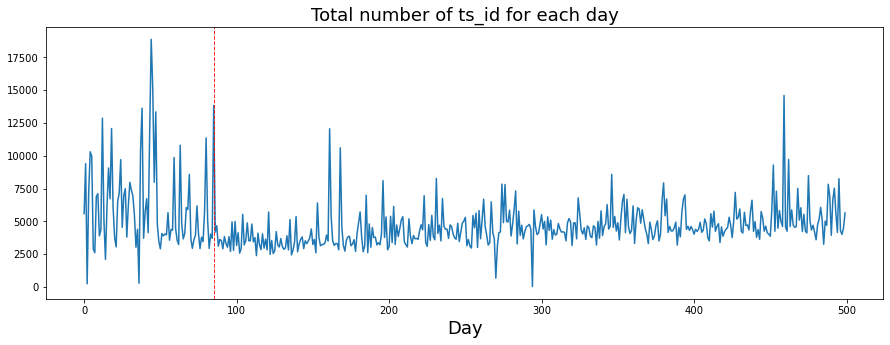

In [5]:
trades_per_day = data_chunk.groupby(['date'])['ts_id'].count()
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(trades_per_day)
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Total number of ts_id for each day", fontsize=18)
# day 85 marker
ax.axvline(x=85, linestyle='--', alpha=0.85, c='red', lw=1)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'str'

In [27]:
feature_df.columns

Index(['feature', 'tag_0', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5',
       'tag_6', 'tag_7', 'tag_8', 'tag_9', 'tag_10', 'tag_11', 'tag_12',
       'tag_13', 'tag_14', 'tag_15', 'tag_16', 'tag_17', 'tag_18', 'tag_19',
       'tag_20', 'tag_21', 'tag_22', 'tag_23', 'tag_24', 'tag_25', 'tag_26',
       'tag_27', 'tag_28'],
      dtype='object')

In [33]:
feature_df = pd.read_csv(r'C:\Users\User\Desktop\Kaggle Dataset\features.csv')
feature_df.set_index('feature',inplace=True)
for each_tag in feature_df.columns[feature_df.columns.str.contains('tag')]:
    print(f'tag name {each_tag}')
    print(feature_df[feature_df[each_tag]].index)

tag name tag_0
Index(['feature_9', 'feature_10', 'feature_19', 'feature_20', 'feature_29',
       'feature_30', 'feature_56', 'feature_73', 'feature_79', 'feature_85',
       'feature_91', 'feature_97', 'feature_103', 'feature_109', 'feature_115',
       'feature_122', 'feature_123'],
      dtype='object', name='feature')
tag name tag_1
Index(['feature_15', 'feature_16', 'feature_25', 'feature_26', 'feature_35',
       'feature_36', 'feature_59', 'feature_76', 'feature_82', 'feature_88',
       'feature_94', 'feature_100', 'feature_106', 'feature_112',
       'feature_118', 'feature_128', 'feature_129'],
      dtype='object', name='feature')
tag name tag_2
Index(['feature_13', 'feature_14', 'feature_23', 'feature_24', 'feature_33',
       'feature_34', 'feature_58', 'feature_75', 'feature_81', 'feature_87',
       'feature_93', 'feature_99', 'feature_105', 'feature_111', 'feature_117',
       'feature_126', 'feature_127'],
      dtype='object', name='feature')
tag name tag_3
Index(['fe

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\preprocessing.py:352: UserWarning: Discarding near-constant features: ['date']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 135 continuous features


C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 1 outliers in column resp.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 1 outliers in column resp_4.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 12 outliers in column resp_2.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 13 outliers in column resp_1.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 3 outliers in column feature_25.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:373: UserWarning: FixedFormatter shoul

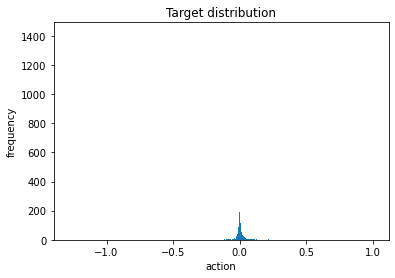

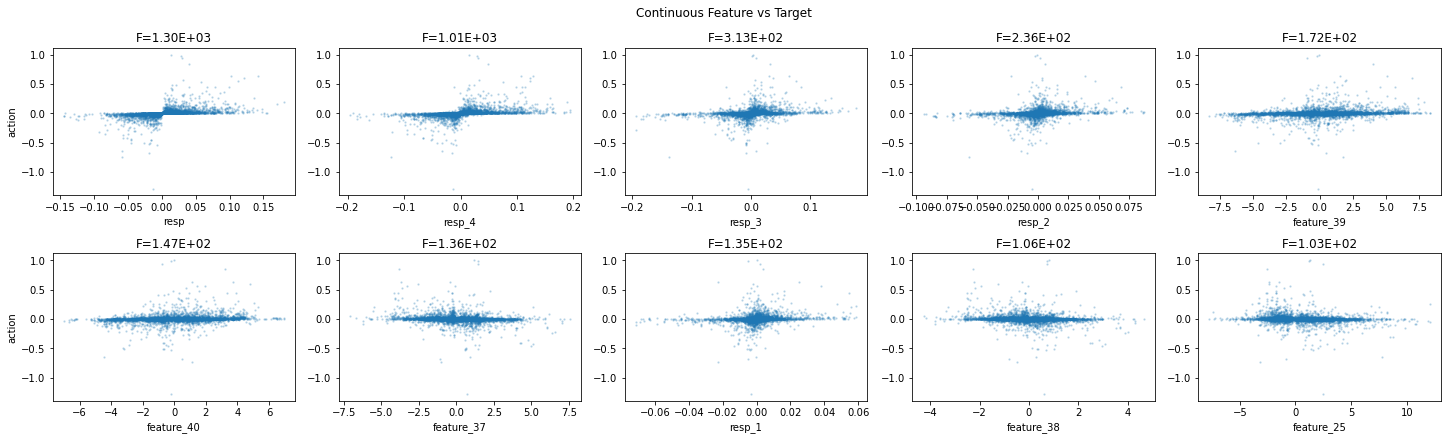

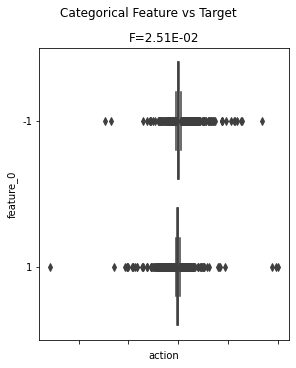

In [33]:
day_0 = data_chunk.loc[data_chunk['date'] == 0]
dabl.plot(day_0, target_col="action")


,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1,0
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4,0
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,-1,-3.172026,-3.093182,...,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,6,1
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,-1,0.446050,-0.466210,...,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,7,1
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390444,499,56.694795,0.001607,0.001607,-0.001245,-0.012068,-0.010023,-1,1.538675,2.530447,...,-0.984942,1.129901,-1.632432,-2.169964,-2.371293,-0.889212,-1.554352,0.215984,2390444,0
2390446,499,1.650055,0.004523,0.004523,0.003172,-0.013886,-0.013637,1,0.270380,-1.231874,...,1.724863,-0.984278,1.413825,-1.598825,2.087731,-1.126050,1.590538,-1.250209,2390446,0
2390478,499,0.895142,0.000486,0.000486,-0.004090,-0.008105,-0.005441,-1,-0.134380,0.160580,...,-0.765664,-2.148415,-0.599358,-3.155134,-0.957971,-2.285314,-0.894580,-2.064227,2390478,0
2390481,499,2.967272,0.000298,0.000298,-0.005393,-0.012472,-0.006681,-1,-0.779554,-0.597258,...,1.173186,-1.215499,0.170404,-3.433334,0.496345,-2.224752,1.207851,-1.264984,2390481,0


In [47]:
# Data mentioned the return will be based on weight and resp columns . create another column call return 
def feature_action_split(dataframe_market):
    '''
    Input : Sample dataframe from Jane market prediction data
    Output : feature = not response , weight , date or ts_id
             action = 0 for pass and 1 for buy
    '''
#     dataframe_market = dataframe_market[dataframe_market['weight'] > 0]
    dataframe_market['action'] = dataframe_market['weight']*dataframe_market['resp']
    dataframe_market['action'] = dataframe_market.apply(buy_or_pass,axis=1) 
    feature = dataframe_market.drop(['date','weight','resp_1','resp_2','resp_3','resp_4','resp','ts_id','action'],axis=1)
    print("Features columns : ",feature.columns)
    action = dataframe_market[['action']]
    print("Action counts : \n",action.value_counts())
    return feature,action
data_chunk = data_chunk[data_chunk['weight']>0]
feature,action = feature_action_split(data_chunk)


Features columns :  Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_120', 'feature_121', 'feature_122', 'feature_123',
       'feature_124', 'feature_125', 'feature_126', 'feature_127',
       'feature_128', 'feature_129'],
      dtype='object', length=130)
Action counts : 
 action
1         999387
0         981900
dtype: int64


In [38]:
# Feature selected only top 10 important features
feature = feature.loc[:,['feature_44','feature_41','feature_45','feature_43','feature_62','feature_42','feature_5','feature_60','feature_6','feature_55']]

In [39]:
action.value_counts()

action
0         1391104
1          999387
dtype: int64

In [40]:
action_transform = ((data_chunk['weight'].values * data_chunk['resp'].values) > 0).astype('int')

In [41]:
action_transform

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
action.values.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
action[:10]

,action
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,1


## Part 2 : Model training with initial setting

Model training . Imputer is not necessary needed for xgboost.

With basic model , we fixed the params to run.

If you are running xgboost on gpu , enable tree_method = 'gpu_hist' else run on normal CPU. 

In [11]:
import xgboost as xgb
import time


train_X, test_X, train_y, test_y = train_test_split(feature, action.values.flatten(), test_size=0.25) # By default shuffle is true

# my_imputer = SimpleImputer()
# train_X = my_imputer.fit_transform(train_X)
# test_X = my_imputer.transform(test_X)
start_time = time.time()

initial_model = xgb.XGBClassifier(
                        n_estimators=1000, 
                        max_depth=5, 
                        learning_rate=0.1, 
                        subsample=0.7,
                        colsample_bytree=0.8, 
                        colsample_bylevel=0.8, 
                        base_score=train_y.mean(),
                        tree_method= 'gpu_hist',
                        random_state=42, seed=42)
init_mod = initial_model.fit(train_X, train_y, 
                    early_stopping_rounds=10, 
                    eval_set=[(test_X, test_y)], eval_metric='error', 
                    verbose=100)

print("--- %s seconds ---" % (time.time() - start_time))


[0]	validation_0-error:0.49247
Will train until validation_0-error hasn't improved in 10 rounds.
[100]	validation_0-error:0.46667
[200]	validation_0-error:0.45827
Stopping. Best iteration:
[266]	validation_0-error:0.45360

--- 3.5820248126983643 seconds ---


Text(0.5, 1.0, 'Initial Model without tuning using Xgboost')

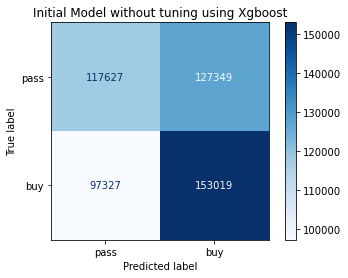

In [12]:
class_names = ['pass','buy']

disp = plot_confusion_matrix(init_mod, test_X, test_y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
plt.title('Initial Model without tuning using Xgboost')

Initial result is decent where test data of 250k points. the losses will incurred when it's predicted __buy__ and it's actual __pass__.

Ideal case for the market is to minimize losses where prediction false positive where true label is pass but predicted as buy and secondly maximizing profit where true positive is predicted buy and true label as buy.



## Part 3: Model tuning using RandomizedSearchCv to search for best hyper parameter



This run will take time , it took 155 minutes to run over 1500 fits with GPU on. 
* Please make sure you on GPU setting when you are running this.

__This part will be commented out as it will take approximately 150 minutes to run__

In [22]:
# from sklearn.model_selection import RandomizedSearchCV
# params = {
#         'learning_rate': [0.03, 0.01, 0.003, 0.001],
#         'min_child_weight': [1, 3, 5, 7, 10],
#         'gamma': [0, 0.5, 1, 1.5, 2, 2.5, 5],
#         'subsample': [0.6, 0.8, 1.0, 1.2, 1.4],
#         'colsample_bytree': [0.6, 0.8, 1.0, 1.2, 1.4],
#         'max_depth': [3, 4, 5, 6, 7, 8, 9 ,10, 12, 14 ,16],
#         'reg_lambda':np.array([0.4, 0.6, 0.8, 1, 1.2, 1.4])}

# # specific parameters. I set early stopping to avoid overfitting and specify the validation dataset 
# fit_params = { 
#         'early_stopping_rounds':10,
#         'eval_set':[(test_X, test_y)]}

# # let's run the optimization
# random_search = RandomizedSearchCV(init_mod, param_distributions=params, n_iter=500,
#                                    scoring="f1_weighted", n_jobs=6,  verbose=3, random_state=42, cv=4 )


In [23]:
# random_search.fit(train_X,train_y, **fit_params)
# print(" Results from Random Search " )
# print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
# print("\n The best score across ALL searched params:\n", random_search.best_score_)
# print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 40.9min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed: 91.8min
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed: 168.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 236.0min
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed: 467.4min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed: 584.2min
[Parallel(n_jobs=6)]: Done 2000 out of 2000 | elapsed: 725.3min finished


[0]	validation_0-error:0.47630
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.46241
[2]	validation_0-error:0.45118
[3]	validation_0-error:0.44572
[4]	validation_0-error:0.44246
[5]	validation_0-error:0.43647
[6]	validation_0-error:0.42764
[7]	validation_0-error:0.42330
[8]	validation_0-error:0.41852
[9]	validation_0-error:0.41556
[10]	validation_0-error:0.41246
[11]	validation_0-error:0.40931
[12]	validation_0-error:0.40742
[13]	validation_0-error:0.40348
[14]	validation_0-error:0.40002
[15]	validation_0-error:0.39901
[16]	validation_0-error:0.39667
[17]	validation_0-error:0.39585
[18]	validation_0-error:0.39494
[19]	validation_0-error:0.39358
[20]	validation_0-error:0.39132
[21]	validation_0-error:0.38885
[22]	validation_0-error:0.38870
[23]	validation_0-error:0.38710
[24]	validation_0-error:0.38676
[25]	validation_0-error:0.38621
[26]	validation_0-error:0.38556
[27]	validation_0-error:0.38510
[28]	validation_0-error:0.38381
[29]	validation_

[250]	validation_0-error:0.31555
[251]	validation_0-error:0.31542
[252]	validation_0-error:0.31520
[253]	validation_0-error:0.31504
[254]	validation_0-error:0.31495
[255]	validation_0-error:0.31493
[256]	validation_0-error:0.31438
[257]	validation_0-error:0.31442
[258]	validation_0-error:0.31399
[259]	validation_0-error:0.31394
[260]	validation_0-error:0.31382
[261]	validation_0-error:0.31351
[262]	validation_0-error:0.31342
[263]	validation_0-error:0.31327
[264]	validation_0-error:0.31319
[265]	validation_0-error:0.31334
[266]	validation_0-error:0.31290
[267]	validation_0-error:0.31276
[268]	validation_0-error:0.31277
[269]	validation_0-error:0.31294
[270]	validation_0-error:0.31281
[271]	validation_0-error:0.31294
[272]	validation_0-error:0.31278
[273]	validation_0-error:0.31273
[274]	validation_0-error:0.31268
[275]	validation_0-error:0.31267
[276]	validation_0-error:0.31253
[277]	validation_0-error:0.31236
[278]	validation_0-error:0.31202
[279]	validation_0-error:0.31205
[280]	vali

[499]	validation_0-error:0.29031
[500]	validation_0-error:0.29020
[501]	validation_0-error:0.29004
[502]	validation_0-error:0.29004
[503]	validation_0-error:0.29003
[504]	validation_0-error:0.28985
[505]	validation_0-error:0.28974
[506]	validation_0-error:0.28966
[507]	validation_0-error:0.28961
[508]	validation_0-error:0.28947
[509]	validation_0-error:0.28943
[510]	validation_0-error:0.28929
[511]	validation_0-error:0.28919
[512]	validation_0-error:0.28905
[513]	validation_0-error:0.28891
[514]	validation_0-error:0.28879
[515]	validation_0-error:0.28861
[516]	validation_0-error:0.28870
[517]	validation_0-error:0.28872
[518]	validation_0-error:0.28863
[519]	validation_0-error:0.28852
[520]	validation_0-error:0.28851
[521]	validation_0-error:0.28848
[522]	validation_0-error:0.28840
[523]	validation_0-error:0.28846
[524]	validation_0-error:0.28829
[525]	validation_0-error:0.28831
[526]	validation_0-error:0.28838
[527]	validation_0-error:0.28831
[528]	validation_0-error:0.28808
[529]	vali

[748]	validation_0-error:0.27860
[749]	validation_0-error:0.27853
[750]	validation_0-error:0.27840
[751]	validation_0-error:0.27843
[752]	validation_0-error:0.27838
[753]	validation_0-error:0.27835
[754]	validation_0-error:0.27840
[755]	validation_0-error:0.27839
[756]	validation_0-error:0.27836
[757]	validation_0-error:0.27820
[758]	validation_0-error:0.27807
[759]	validation_0-error:0.27804
[760]	validation_0-error:0.27789
[761]	validation_0-error:0.27786
[762]	validation_0-error:0.27788
[763]	validation_0-error:0.27779
[764]	validation_0-error:0.27778
[765]	validation_0-error:0.27772
[766]	validation_0-error:0.27768
[767]	validation_0-error:0.27770
[768]	validation_0-error:0.27768
[769]	validation_0-error:0.27756
[770]	validation_0-error:0.27736
[771]	validation_0-error:0.27735
[772]	validation_0-error:0.27724
[773]	validation_0-error:0.27713
[774]	validation_0-error:0.27709
[775]	validation_0-error:0.27707
[776]	validation_0-error:0.27704
[777]	validation_0-error:0.27711
[778]	vali

## Part 4:  Model training with best hyper-parameter result

In [48]:
import xgboost as xgb
import time



train_X, test_X, train_y, test_y = train_test_split(feature, action.values.flatten(), test_size=0.25) # By default shuffle is true

# my_imputer = SimpleImputer()
# train_X = my_imputer.fit_transform(train_X)
# test_X = my_imputer.transform(test_X)
start_time = time.time()

tuned_model = xgb.XGBClassifier(n_estimators=1000, 
                        max_depth=16, 
                        learning_rate=0.03, 
                        subsample=0.6,
                        colsample_bytree=0.6, 
                        colsample_bylevel=0.8, 
                        gamma=0.5,reg_lambda = 1.4,
#                         objective = 'binary:logistic',
                        base_score=train_y.mean(),
                        tree_method= 'gpu_hist',
                        random_state=42, seed=42)
# 'subsample': 0.6, 'reg_lambda': 1.4, 'min_child_weight': 3, 'max_depth': 16, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 0.6


tuned_mod = tuned_model.fit(train_X, train_y, 
                    early_stopping_rounds=20, 
                    eval_set=[(test_X, test_y)], eval_metric='error', 
                    verbose=100)

print("--- %s seconds ---" % (time.time() - start_time))


[0]	validation_0-error:0.48071
Will train until validation_0-error hasn't improved in 20 rounds.
[100]	validation_0-error:0.40338
[200]	validation_0-error:0.39073
[300]	validation_0-error:0.38362
Stopping. Best iteration:
[348]	validation_0-error:0.38205

--- 316.3590044975281 seconds ---


Text(0.5, 1.0, 'Tuned Model')

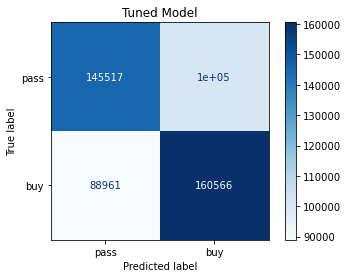

In [49]:
class_names = ['pass','buy']

disp = plot_confusion_matrix(tuned_mod, test_X, test_y,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
plt.title('Tuned Model')

In [34]:
tuned_model.predict('test_X')

NameError: name 'tuned_model' is not defined

## Part 5: Model error comparison between initial Xgboost classifer model and tuned hyperparameter xgboost classifier model

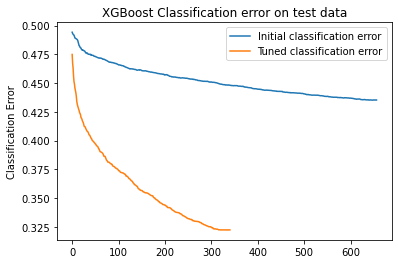

In [33]:

init_model_res = init_mod.evals_result()
tuned_model_res = tuned_mod.evals_result()
epochs_init = len(init_model_res['validation_0']['error'])
epochs_tuned = len(tuned_model_res['validation_0']['error'])
x_axis_init = range(0, epochs_init)
x_axis_tuned = range(0,epochs_tuned)
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis_init, init_model_res['validation_0']['error'], label='Initial classification error')
ax.plot(x_axis_tuned, tuned_model_res['validation_0']['error'], label='Tuned classification error')

ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification error on test data')
plt.show()

### Part 6: Tuned-model feature importance visualization

{'feature_28': 18805, 'feature_92': 18860, 'feature_5': 49057, 'feature_43': 59324, 'feature_49': 19050, 'feature_20': 13845, 'feature_4': 38939, 'feature_89': 25979, 'feature_62': 54061, 'feature_95': 24073, 'feature_44': 66322, 'feature_104': 20200, 'feature_125': 29381, 'feature_90': 22592, 'feature_41': 65050, 'feature_128': 16535, 'feature_84': 24349, 'feature_11': 20729, 'feature_17': 19920, 'feature_57': 29782, 'feature_50': 19928, 'feature_55': 43383, 'feature_69': 18538, 'feature_52': 20245, 'feature_114': 21974, 'feature_29': 13917, 'feature_67': 26236, 'feature_45': 64126, 'feature_101': 27258, 'feature_65': 24938, 'feature_78': 23748, 'feature_83': 39835, 'feature_122': 18336, 'feature_108': 24545, 'feature_60': 48924, 'feature_36': 10154, 'feature_40': 31132, 'feature_38': 29650, 'feature_31': 16047, 'feature_58': 26416, 'feature_129': 20829, 'feature_86': 19466, 'feature_13': 17342, 'feature_82': 10252, 'feature_2': 18888, 'feature_21': 15633, 'feature_75': 13773, 'featur

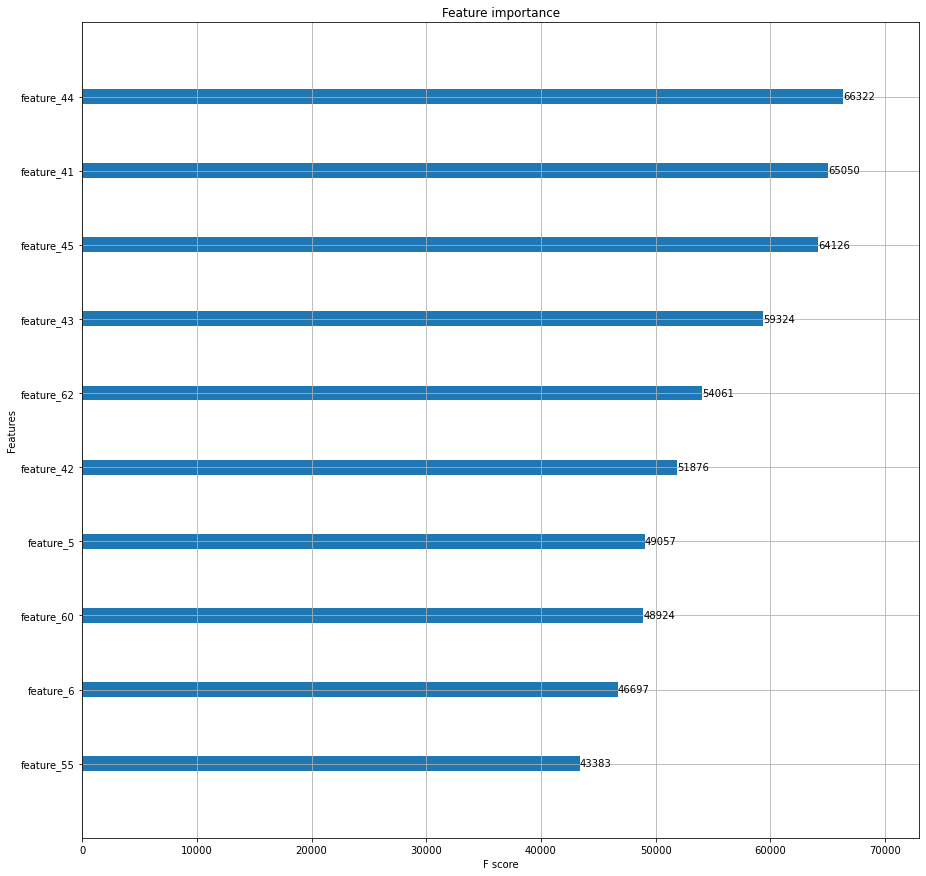

In [18]:
# import matplotlib.pyplot as plt
# from xgboost import plot_importance
# print(tuned_mod.get_booster().get_score(importance_type='weight'))

# fig,ax = plt.subplots(figsize=(15,15))
# plot_importance(tuned_mod,ax=ax,max_num_features=10)
# plt.show()

In [1]:
import torch

In [ ]:
test_df.iloc[:,2:].values

In [ ]:
env = janestreet.make_env() # initialize the environment
iter_test = env.iter_test() # an iterator which loops over the test set

for (test_df, sample_prediction_df) in iter_test:
    sample_prediction_df.action = tuned_mod.predict(test_df.iloc[:,2:].values)
    env.predict(sample_prediction_df)


In [1]:
import dabl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
sc = dabl.SimpleClassifier().fit(X_train, y_train)
print("Accuracy score", sc.score(X_test, y_test))

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\preprocessing.py:352: UserWarning: Discarding near-constant features: [0, 7, 8, 15, 16, 23, 24, 31, 32, 39, 40, 47, 48, 56]
  near_constant.index[near_constant].tolist()))


Running DummyClassifier(strategy='prior')
accuracy: 0.106 recall_macro: 0.100 precision_macro: 0.011 f1_macro: 0.019
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.106 recall_macro: 0.100 precision_macro: 0.011 f1_macro: 0.019

Running GaussianNB()
accuracy: 0.814 recall_macro: 0.815 precision_macro: 0.829 f1_macro: 0.817
=== new best GaussianNB() (using recall_macro):
accuracy: 0.814 recall_macro: 0.815 precision_macro: 0.829 f1_macro: 0.817

Running MultinomialNB()
accuracy: 0.905 recall_macro: 0.906 precision_macro: 0.909 f1_macro: 0.906
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.905 recall_macro: 0.906 precision_macro: 0.909 f1_macro: 0.906

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.196 recall_macro: 0.199 precision_macro: 0.076 f1_macro: 0.099
Running DecisionTreeClassifier(class_weight='balanced', max_depth=10)
accuracy: 0.831 recall_macro: 0.832 precision_macro: 0.836 f1_macro: 0.832
Run

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\preprocessing.py:352: UserWarning: Discarding near-constant features: [0, 7, 8, 15, 16, 23, 24, 31, 32, 39, 40, 47, 48, 56]
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 50 continuous features
Linear Discriminant Analysis training set score: 0.963


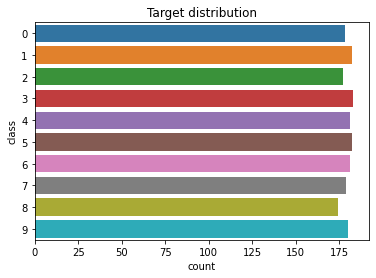

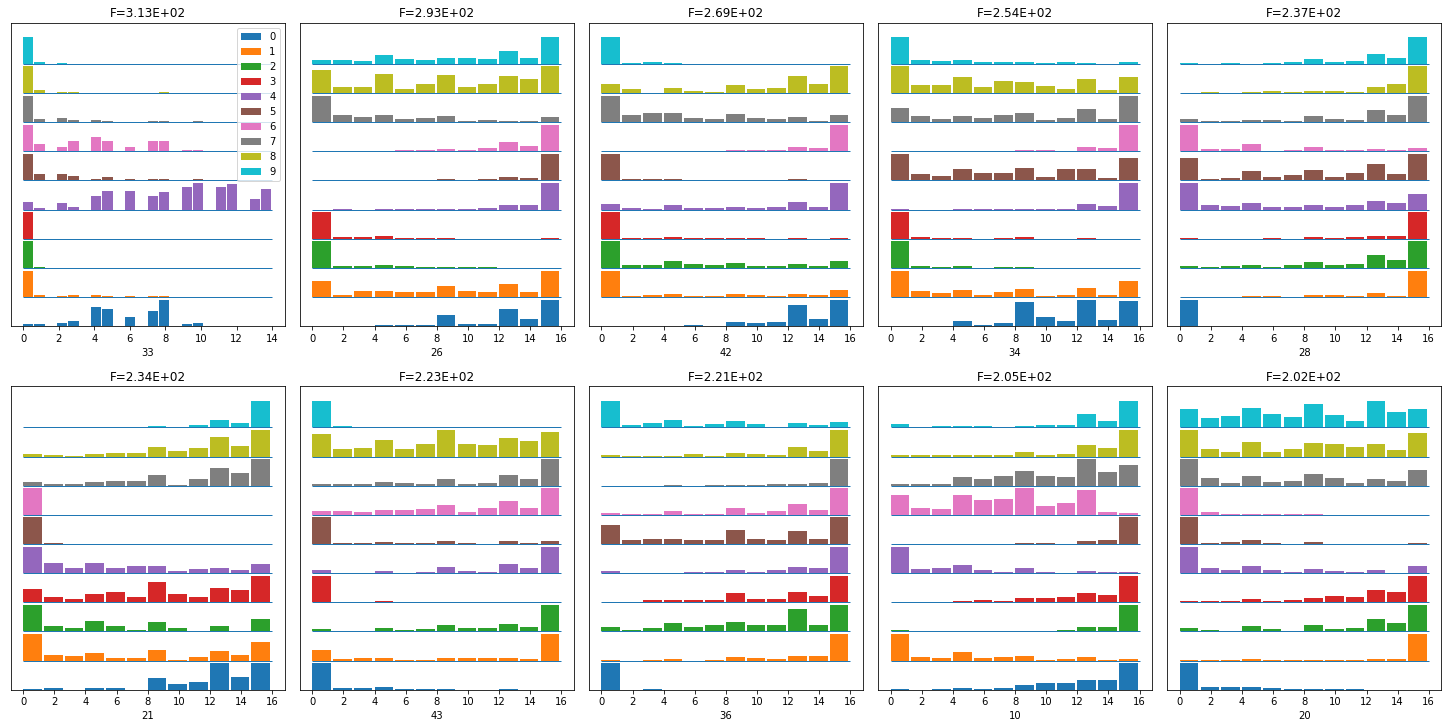

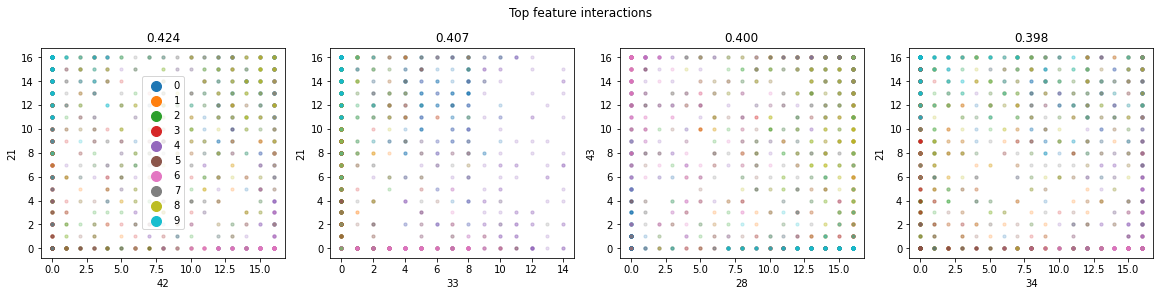

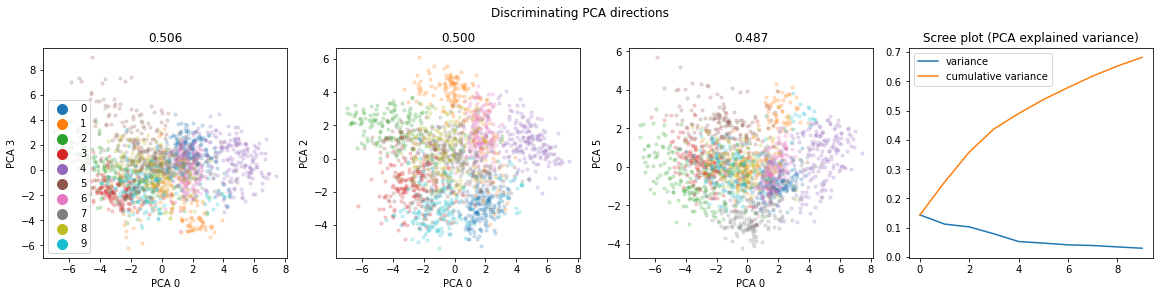

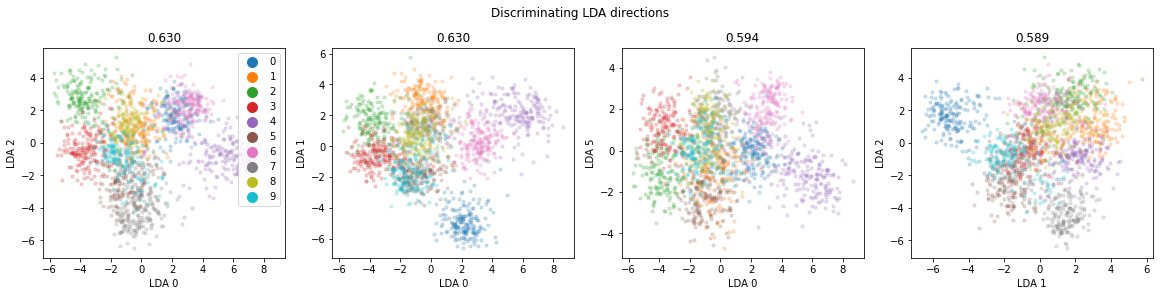

In [3]:
dabl.plot(X, y)

C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\supervised.py:540: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\preprocessing.py:352: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


Target looks like regression
Showing only top 10 of 26 continuous features


C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 5 outliers in column Gr Liv Area.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 1 outliers in column Garage Cars.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 2 outliers in column Total Bsmt SF.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 4 outliers in column 1st Flr SF.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarning: Dropped 1 outliers in column Garage Yr Blt.
  int(dropped), series.name), UserWarning)
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:630: UserWarni

Showing only top 10 of 42 categorical features


C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\User\anaconda3\envs\xgboost_env\lib\site-packages\dabl\plot\utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
C:\Users\User\anaconda3\envs\xgboost_env\lib\

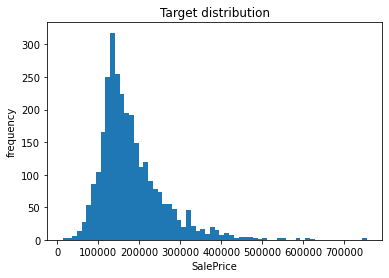

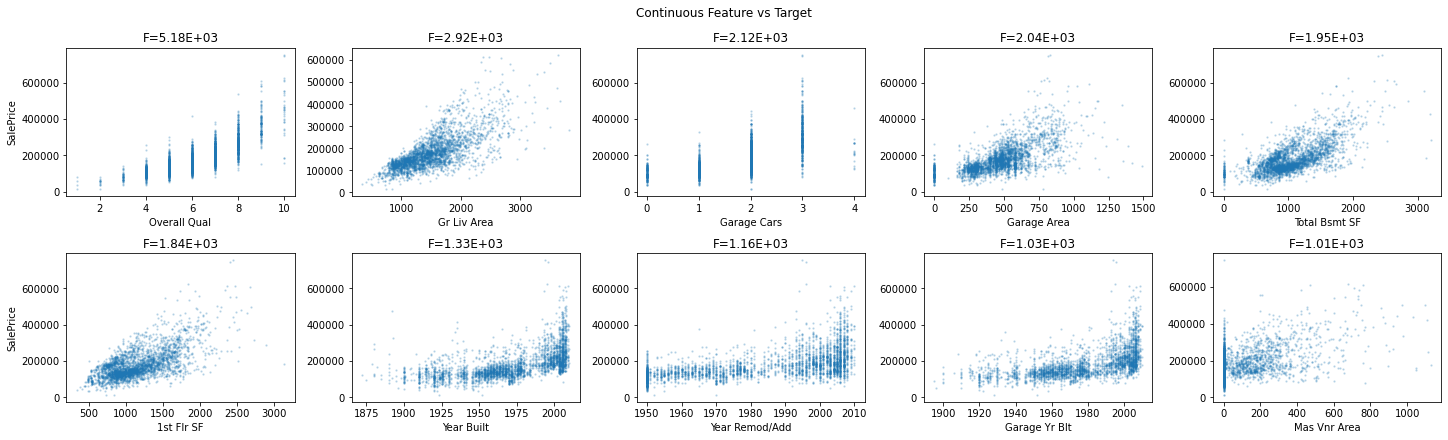

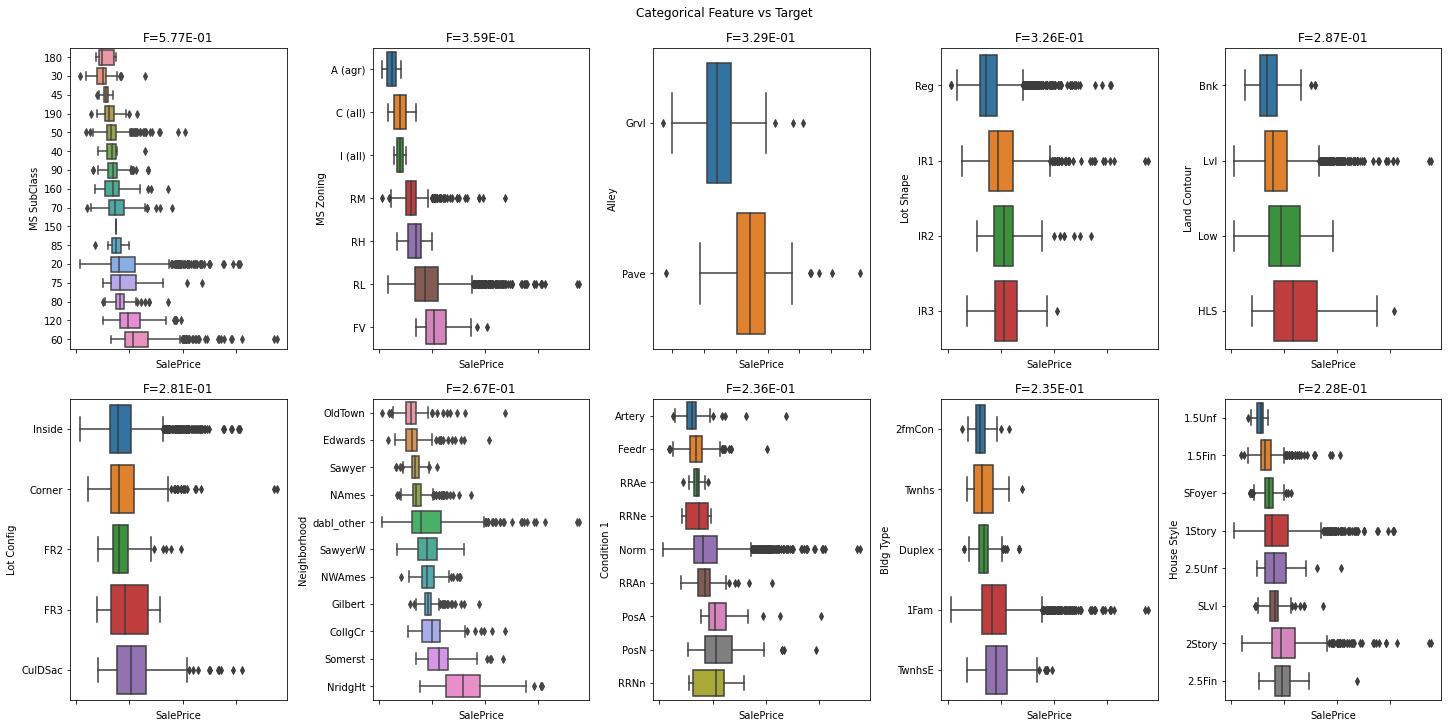

In [4]:
"""
Ames Housing Dataset Visualization
====================================
"""
# sphinx_gallery_thumbnail_number = 3
from dabl import plot
from dabl.datasets import load_ames
import matplotlib.pyplot as plt

# load the ames housing dataset
# returns a plain dataframe
data = load_ames()

plot(data, 'SalePrice')
plt.show()
